# Import and explore

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [23]:
#Create a path to where your data is stored.
path = r'D:\WORK\Bootcamp\Machine Learning\Achievement 1\Project\Data'

In [24]:
#Read in the European weather data.

# Read the CSV file
df = pd.read_csv(os.path.join(path, "Prepared", 'Data_scaled_v2.csv'))
df_ans = pd.read_csv(os.path.join(path, "Original", 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [25]:
df.columns

Index(['Unnamed: 0', 'DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=171)

In [26]:
df_ans.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [27]:
df_ans.head(10)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,19600106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,19600107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,19600108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,19600109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,19600110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Extract bases from df (columns ending with '_humidity')
bases_in_df = {col.split('_')[0] for col in df.columns if col.endswith('_humidity')}

# Extract bases from df_ans (columns ending with '_pleasant_weather')
bases_in_df_ans = {col.split('_')[0] for col in df_ans.columns if col.endswith('_pleasant_weather')}

# Find the missing "bases" in df_ans
missing_bases = bases_in_df - bases_in_df_ans

# Print the result
print("Missing bases in df_ans:", missing_bases)

Missing bases in df_ans: {'GDANSK', 'ROMA', 'TOURS'}


In [29]:
# Drop columns in df_ans that start with any missing base
columns_to_drop = [col for col in df.columns if any(col.startswith(base) for base in missing_bases)]

# Drop these columns from df_ans
df = df.drop(columns=columns_to_drop)

# Print confirmation
print(f"Columns dropped: {columns_to_drop}")

columns_to_drop

Columns dropped: ['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max']


['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max']

In [30]:
df.head(10)

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
5,5,19600106,-1.599964,-1.833187,-0.02793,0.193738,-0.001949,-0.628526,-0.445514,-0.179228,...,-0.443701,-0.925546,1.711326,-0.947804,-0.490810,-0.024706,-0.769214,-1.990070,-2.323360,-1.384912
6,6,19600107,-1.599964,-1.001953,-0.02793,1.006770,-0.001949,-0.735921,-0.445514,-0.179228,...,0.783085,-1.347371,0.816395,-0.841771,-0.490810,-0.024706,-0.378748,-0.848468,-0.956984,-0.608447
7,7,19600108,-1.599964,1.076130,-0.02793,1.729466,-0.001949,-1.240680,-0.265148,-0.179228,...,-2.283879,-1.487980,0.564696,-0.747520,-0.490810,-0.024706,0.822684,-0.668215,-0.328451,-0.924785
8,8,19600109,-1.599964,1.076130,-0.02793,2.000476,-0.001949,-1.240680,0.676766,-0.179228,...,-0.443701,-2.191022,0.937583,-1.171651,-0.490810,-0.024706,-1.009500,-1.178932,-0.574398,-1.643734
9,9,19600110,-1.599964,-1.001953,-0.02793,-0.167609,-0.001949,-1.036629,-0.425473,2.313062,...,-2.897272,-2.331630,1.534204,-0.759301,-0.490810,-0.024706,0.882756,-2.681040,-2.104740,-2.448957


In [31]:
# Drop the specified columns
df = df.drop(columns=['Unnamed: 0'])

In [32]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1.013583,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,1.013583,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,1.013583,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,1.013583,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [33]:
# Filter columns that end with '_temp_mean' or are 'DATE' or 'MONTH'
columns_to_keep = [col for col in df.columns if col.endswith('_temp_mean') or col in ['DATE', 'MONTH']]
df = df[columns_to_keep]

# Print the remaining columns
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['DATE', 'MONTH', 'BASEL_temp_mean', 'BELGRADE_temp_mean', 'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean', 'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean', 'MUNCHENB_temp_mean', 'OSLO_temp_mean', 'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean', 'VALENTIA_temp_mean']


In [34]:
df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,-1.599964,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,19600102,-1.599964,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,19600103,-1.599964,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,19600104,-1.599964,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,19600105,-1.599964,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,1.013583,0.747959,0.628750,-0.005167,0.898267,1.042841,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,0.826301,0.517090,-0.007287
22946,20221028,1.013583,0.856604,0.367720,-0.005167,0.945734,1.278467,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,1.074927,0.641496,-0.007287
22947,20221029,1.013583,0.856604,0.083991,-0.005167,0.914089,1.101748,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,1.221178,0.716139,-0.007287
22948,20221030,1.013583,0.680055,0.265577,-0.005167,0.692578,0.880848,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,1.235803,0.019467,-0.007287


# Create Matrix

In [35]:
#Create an 'X' matrix
X = df.drop(columns=['DATE', 'MONTH'])
y = df_ans.drop(columns=['DATE'])

In [36]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [38]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


# Run Test

In [49]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,8)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3 4 5 6 7]
i - 1
k - [1 2 3 4 5 6 7]
i - 2
k - [1 2 3 4 5 6 7]
i - 3
k - [1 2 3 4 5 6 7]
i - 4
k - [1 2 3 4 5 6 7]
i - 5
k - [1 2 3 4 5 6 7]
i - 6
k - [1 2 3 4 5 6 7]


<function matplotlib.pyplot.show(close=None, block=None)>

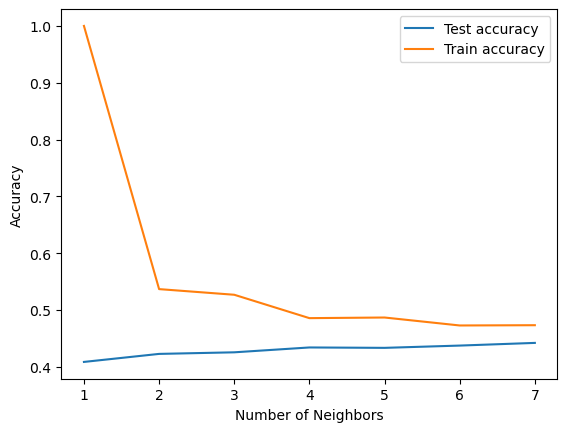

In [50]:
#Plot the relationship between number of neighbors and accuracy.
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [45]:
print(type(y_test))  # Check if it's numpy.ndarray or pandas.DataFrame
print(y_test.shape)  # Check its dimensions

<class 'numpy.ndarray'>
(5738, 15)


c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

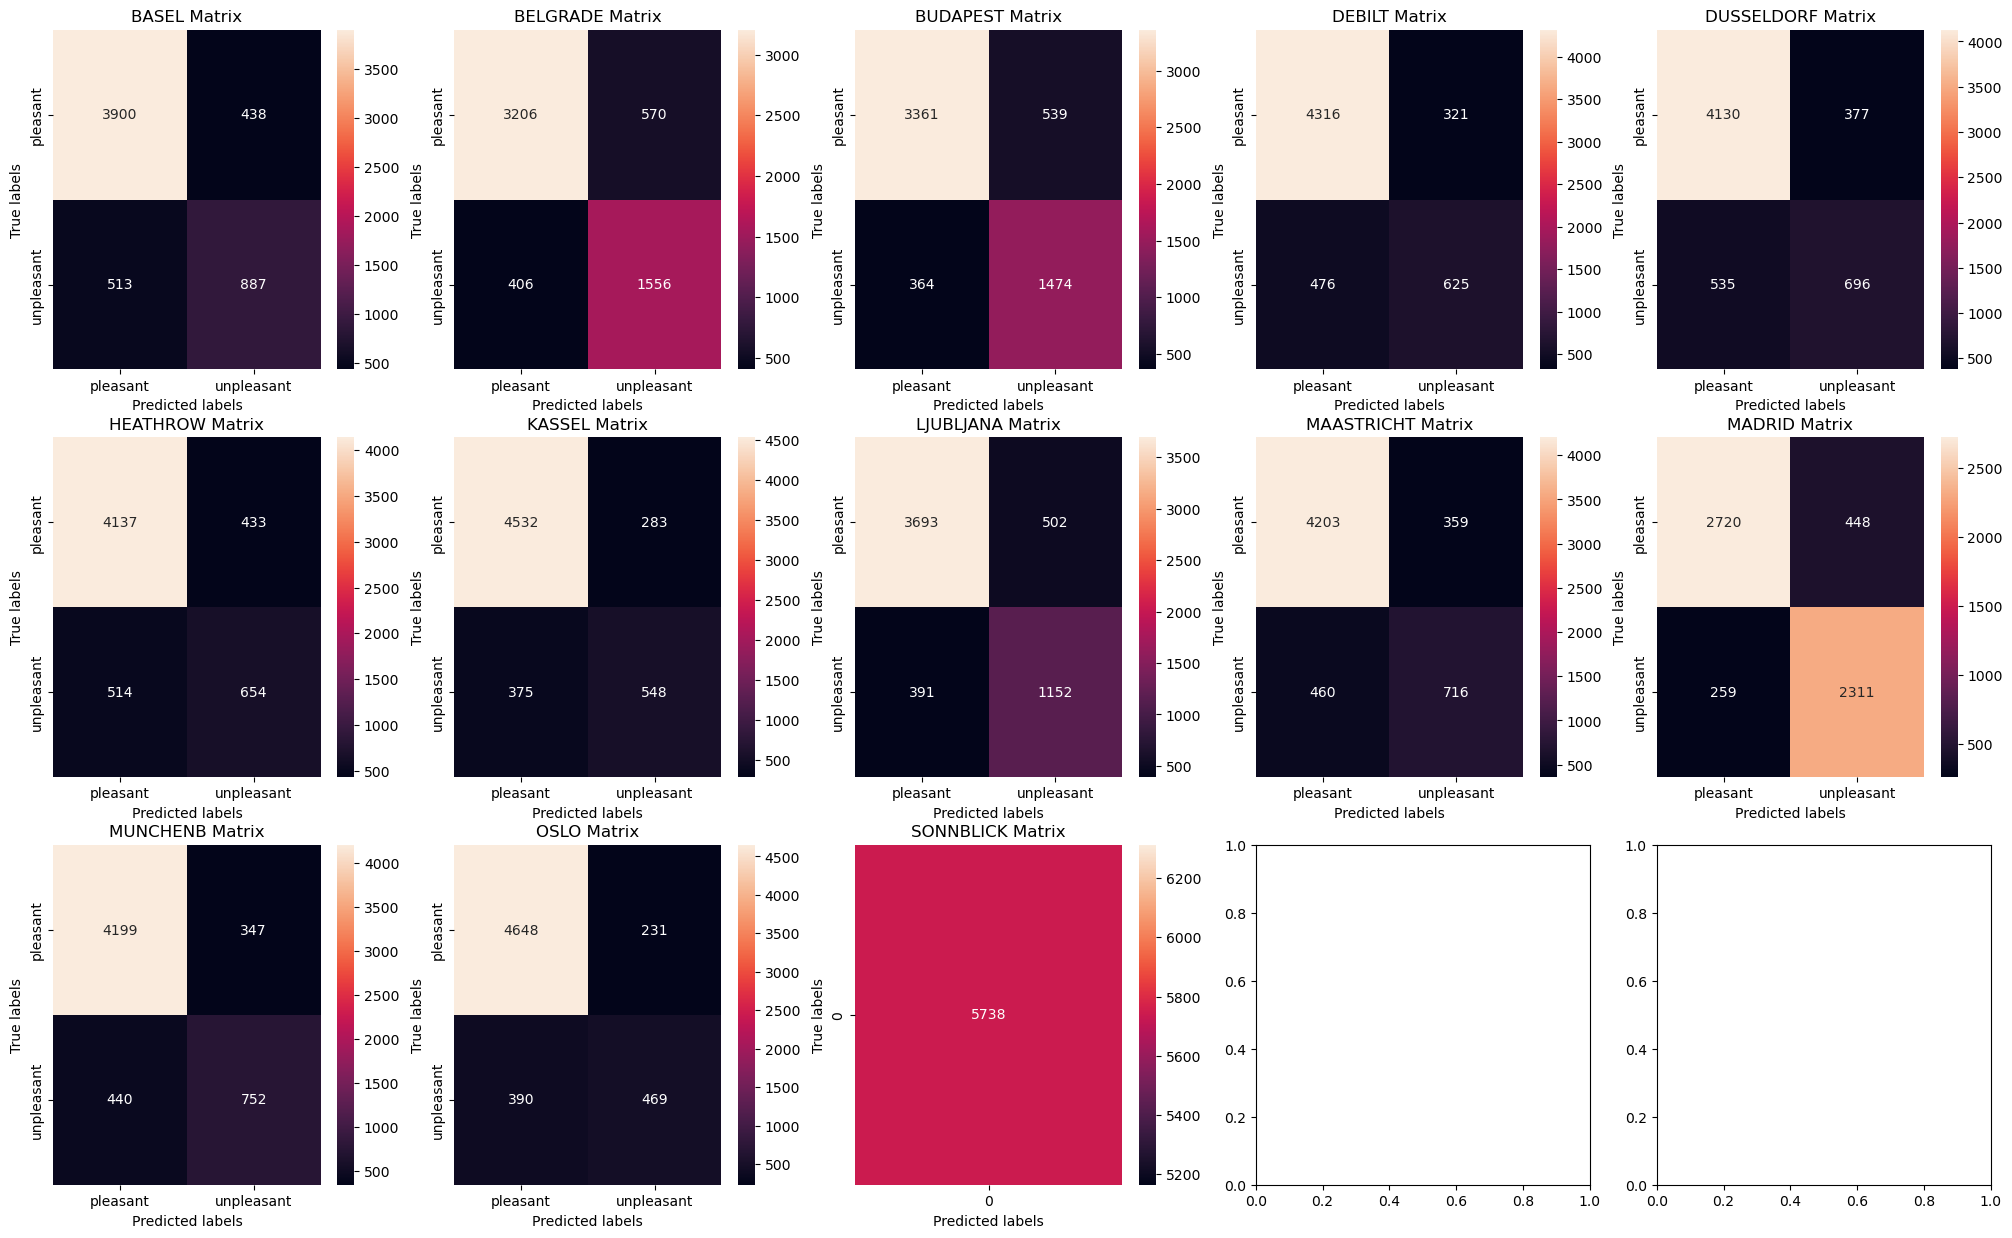

In [52]:
# Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']   

figure, ax = plt.subplots(3, 5, figsize=(25,15))

count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:,count], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 

        ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why? - overfit
        ax[i,j].yaxis.set_ticklabels(labels)
       
        count+=1



plt.tight_layout()
plt.show()
1


In [53]:
# Drop these columns from df_ans
df_test = df.drop(columns=['SONNBLICK_temp_mean'])
df_ans = df_ans.drop(columns=['SONNBLICK_pleasant_weather'])

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

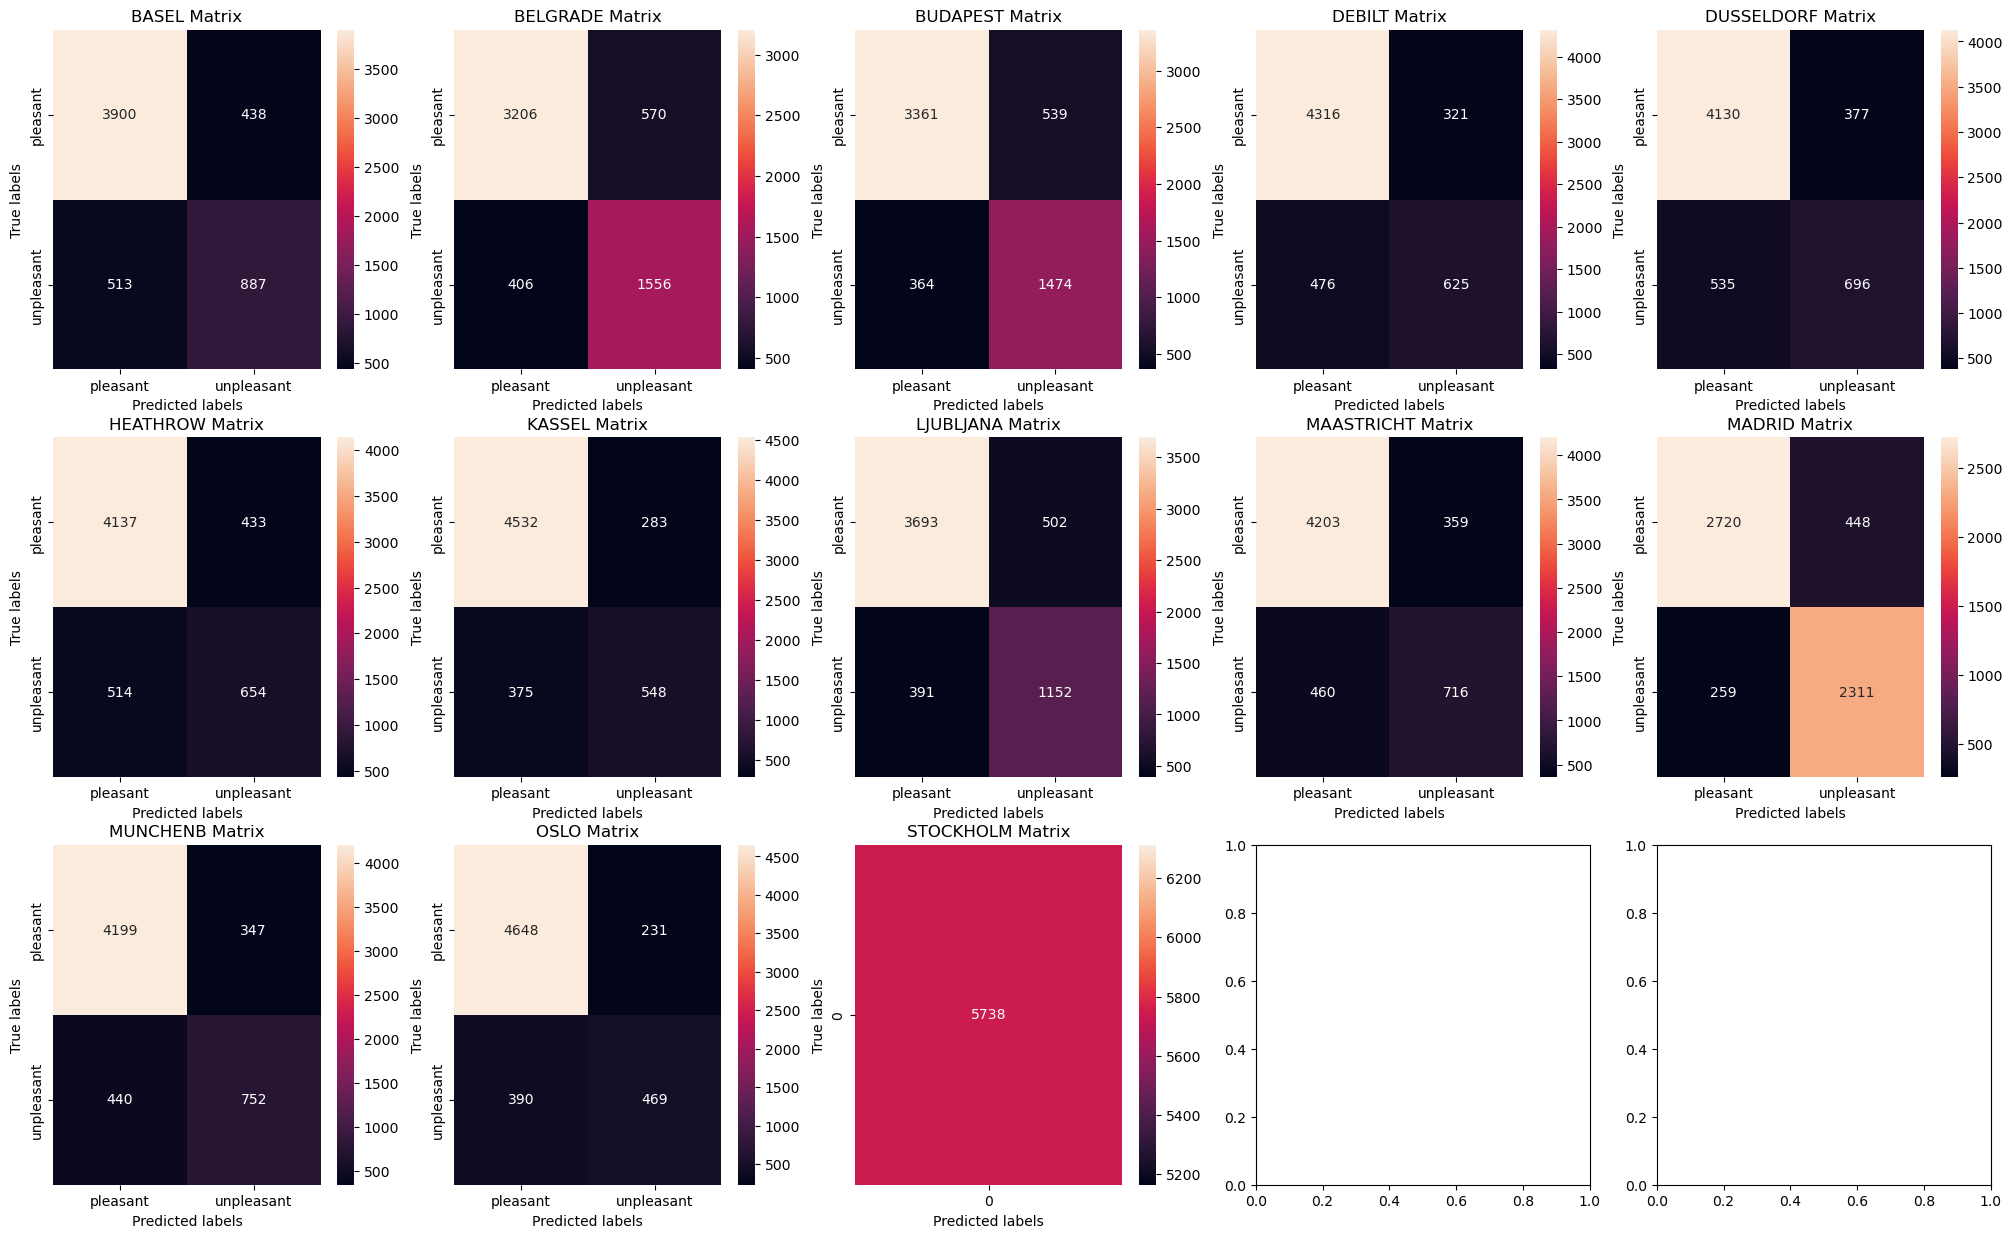

In [54]:
# Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df_test.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']   

figure, ax = plt.subplots(3, 5, figsize=(25,15))

count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:,count], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 

        ax[i,j].xaxis.set_ticklabels(labels)
        ax[i,j].yaxis.set_ticklabels(labels)
       
        count+=1



plt.tight_layout()
plt.show()
1

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


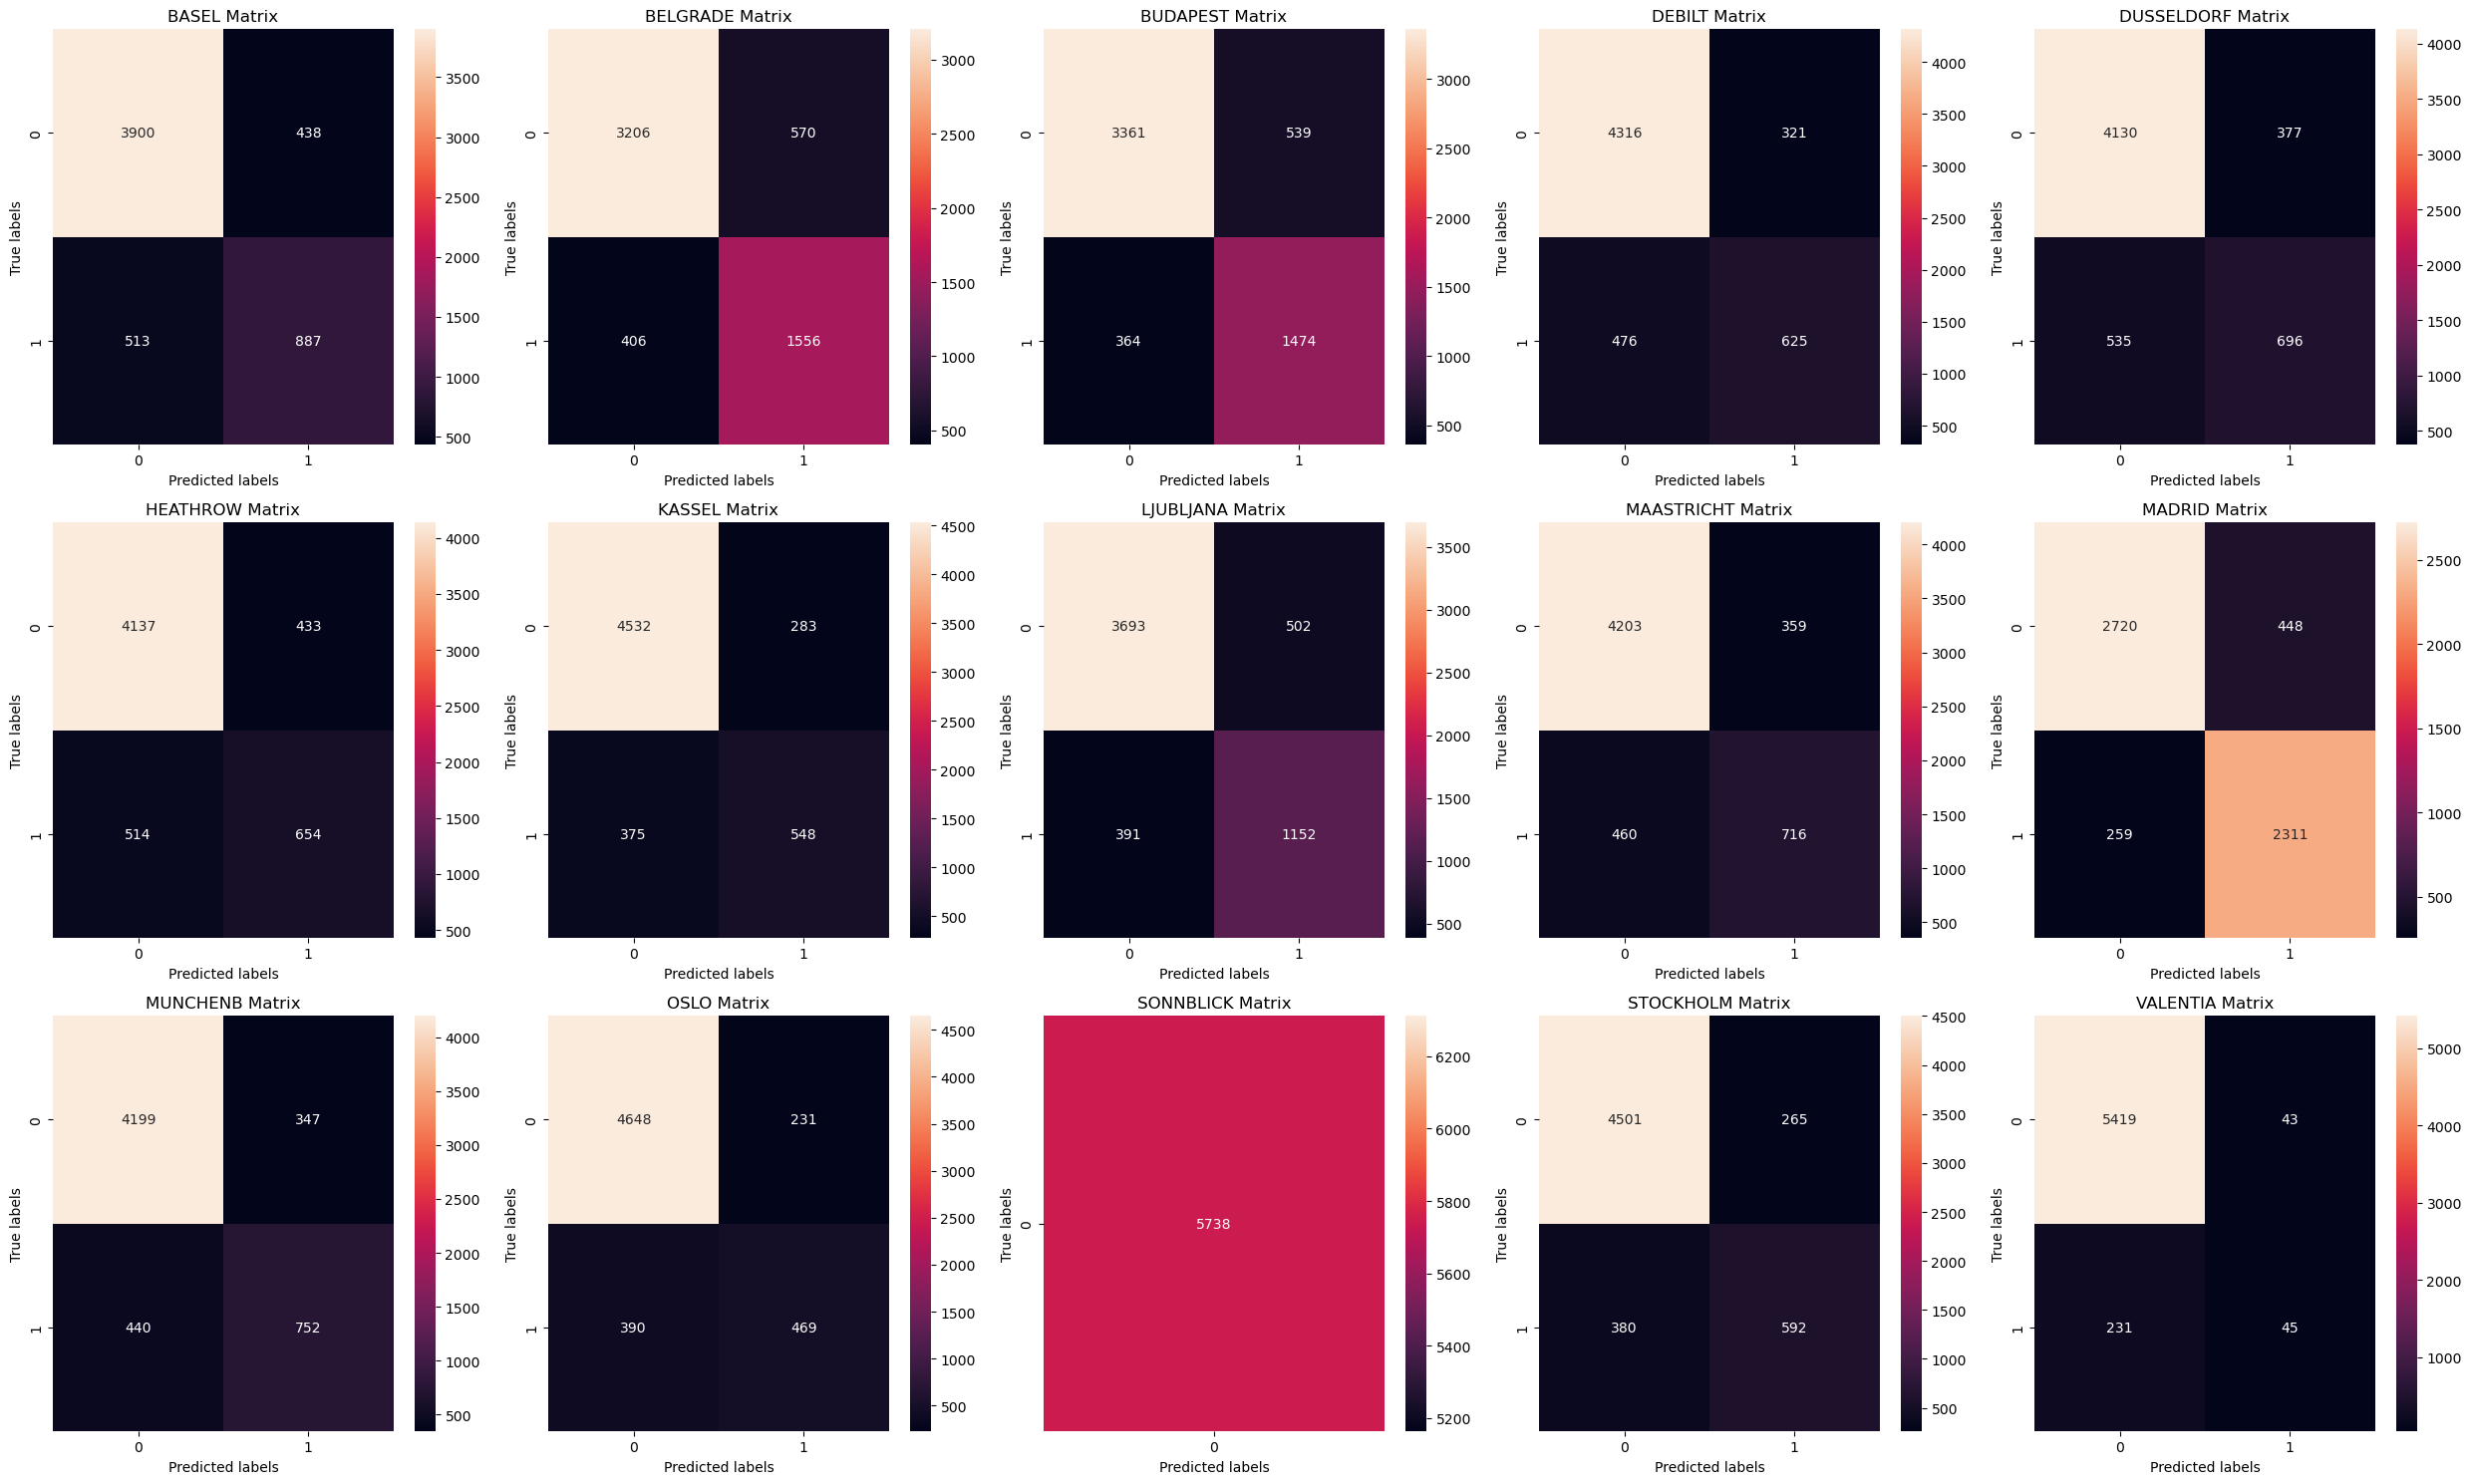

1

In [55]:
# Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']   

figure, ax = plt.subplots(3, 5, figsize=(25,15))

count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:,count], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 

        #ax[i,j].xaxis.set_ticklabels(labels)
        #ax[i,j].yaxis.set_ticklabels(labels)
       
        count+=1



plt.tight_layout()
plt.show()
1

In [56]:
#Chat GPT
import pandas as pd
from sklearn.metrics import confusion_matrix

# Prepare a list to store confusion matrix details
matrix_data = []

# Loop through each location to compute confusion matrices
count = 0
for i in range(3):
    for j in range(5):
        if count >= len(locations):  # Avoid index error if locations < 15
            break

        name = locations[count]
        cm = confusion_matrix(y_test[:, count], y_pred[:, count])

        # Ensure the confusion matrix is 2x2
        if cm.shape == (1, 1):  # Only one class in the data
            cm_full = [[cm[0, 0], 0], [0, 0]]
        elif cm.shape == (2, 1):  # One class in predictions
            cm_full = [[cm[0, 0], 0], [cm[1, 0], 0]]
        elif cm.shape == (1, 2):  # One class in ground truth
            cm_full = [[cm[0, 0], cm[0, 1]], [0, 0]]
        else:  # Full 2x2 matrix
            cm_full = cm

        # Extract confusion matrix values
        matrix_name = name + "_Matrix"
        value_00 = cm_full[0][0]
        value_11 = cm_full[1][1]
        value_01 = cm_full[0][1]
        value_10 = cm_full[1][0]
        
        # Append to the data list
        matrix_data.append([matrix_name, value_00, value_11, value_01, value_10])
        count += 1

# Create a DataFrame for the confusion matrix summary
confusion_matrix_summary = pd.DataFrame(
    matrix_data, 
    columns=["Matrix Name", "0,0", "1,1", "0,1", "1,0"]
)

# Display the table directly using pandas
print(confusion_matrix_summary)

# Optionally save the table to a file (e.g., CSV)
confusion_matrix_summary.to_csv("confusion_matrix_summary.csv", index=False)


          Matrix Name   0,0   1,1  0,1  1,0
0        BASEL_Matrix  3900   887  438  513
1     BELGRADE_Matrix  3206  1556  570  406
2     BUDAPEST_Matrix  3361  1474  539  364
3       DEBILT_Matrix  4316   625  321  476
4   DUSSELDORF_Matrix  4130   696  377  535
5     HEATHROW_Matrix  4137   654  433  514
6       KASSEL_Matrix  4532   548  283  375
7    LJUBLJANA_Matrix  3693  1152  502  391
8   MAASTRICHT_Matrix  4203   716  359  460
9       MADRID_Matrix  2720  2311  448  259
10    MUNCHENB_Matrix  4199   752  347  440
11        OSLO_Matrix  4648   469  231  390
12   SONNBLICK_Matrix  5738     0    0    0
13   STOCKHOLM_Matrix  4501   592  265  380
14    VALENTIA_Matrix  5419    45   43  231


c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
